# Exploring airplane crashes

The odds of dying on a commercial airline flight are actually as low as 9 million to 1. That said, a lot can go wrong at 33,000 feet (10,058.4 m) above the ground, and if you’re unlucky enough to be aboard when something does, the decisions you make could mean the difference between life and death. Almost 95% of airplane crashes have survivors, so even if the worst does happen, your odds aren't as bad as you might think.

# Problem Statement:
This problem is meant to solve the following questions: 

###### 1). Yearly how many planes crashed? how many people were on board? how many survived? how many died? 
###### 2). Highest number of crashes by operator and Type of aircrafts.<br>
###### 3). ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters       i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your       choice but they should not exceed 7.<br>
###### 4). Find the number of crashed aircrafts and number of deaths against each category from above step.<br>
###### 5). Find any interesting trends/behaviors that you encounter when you analyze the dataset.<br>

## Setting up the environment

In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import os
Data = pd.read_csv('Dataset1.csv')
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle'))

## Data Preprocessing


In [2]:
np.random.seed(42) 
obs, feat = Data.shape
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [3]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

Theoretically, Aboard = Fatalities + Ground, but it does not look like this. So we just skipped Ground row for any further analysis.
Now let's look how data looks like and check how many missing values are here.

In [4]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

There are not so many missing values of variables we are most interested in (Date, Operator, Aboard, Fatalities, ...).
Let's move futher and do some manipulations with data.

We create a new row with 'Date + Time' format.We replace all the missing values of Time with 0:00. Then remove some wrong symbols and fix broken values. 

In [5]:
#cleaning up
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


After this manipulations we have a new Time column with *%m/%d/%Y %H:%M* format. We can see that almost 10 year of recent information is missing so we will not see the actual trend.

## Exploratory Data Analysis

### Total accidents

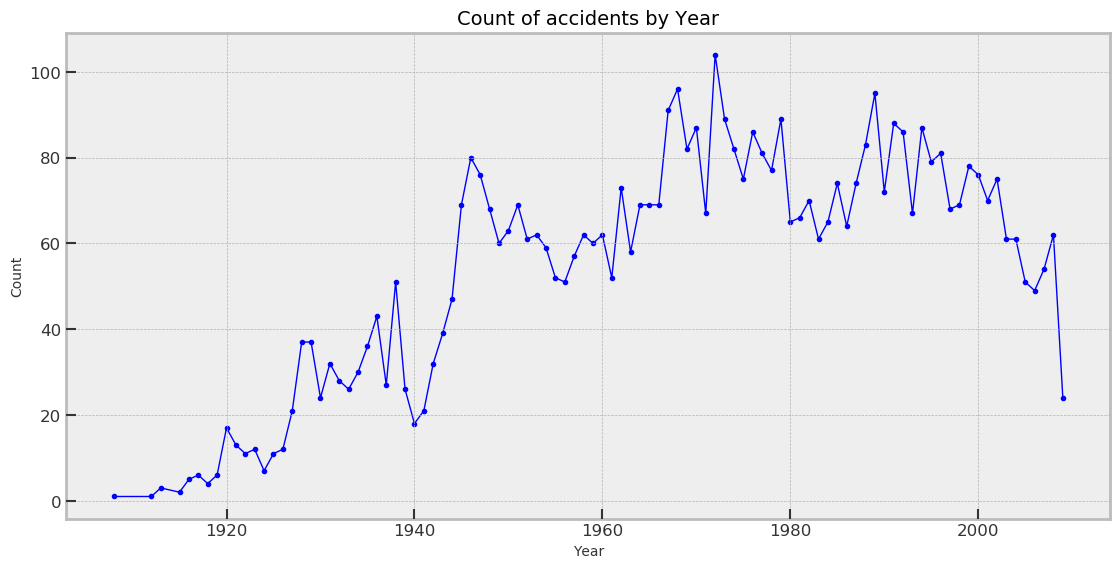

In [6]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

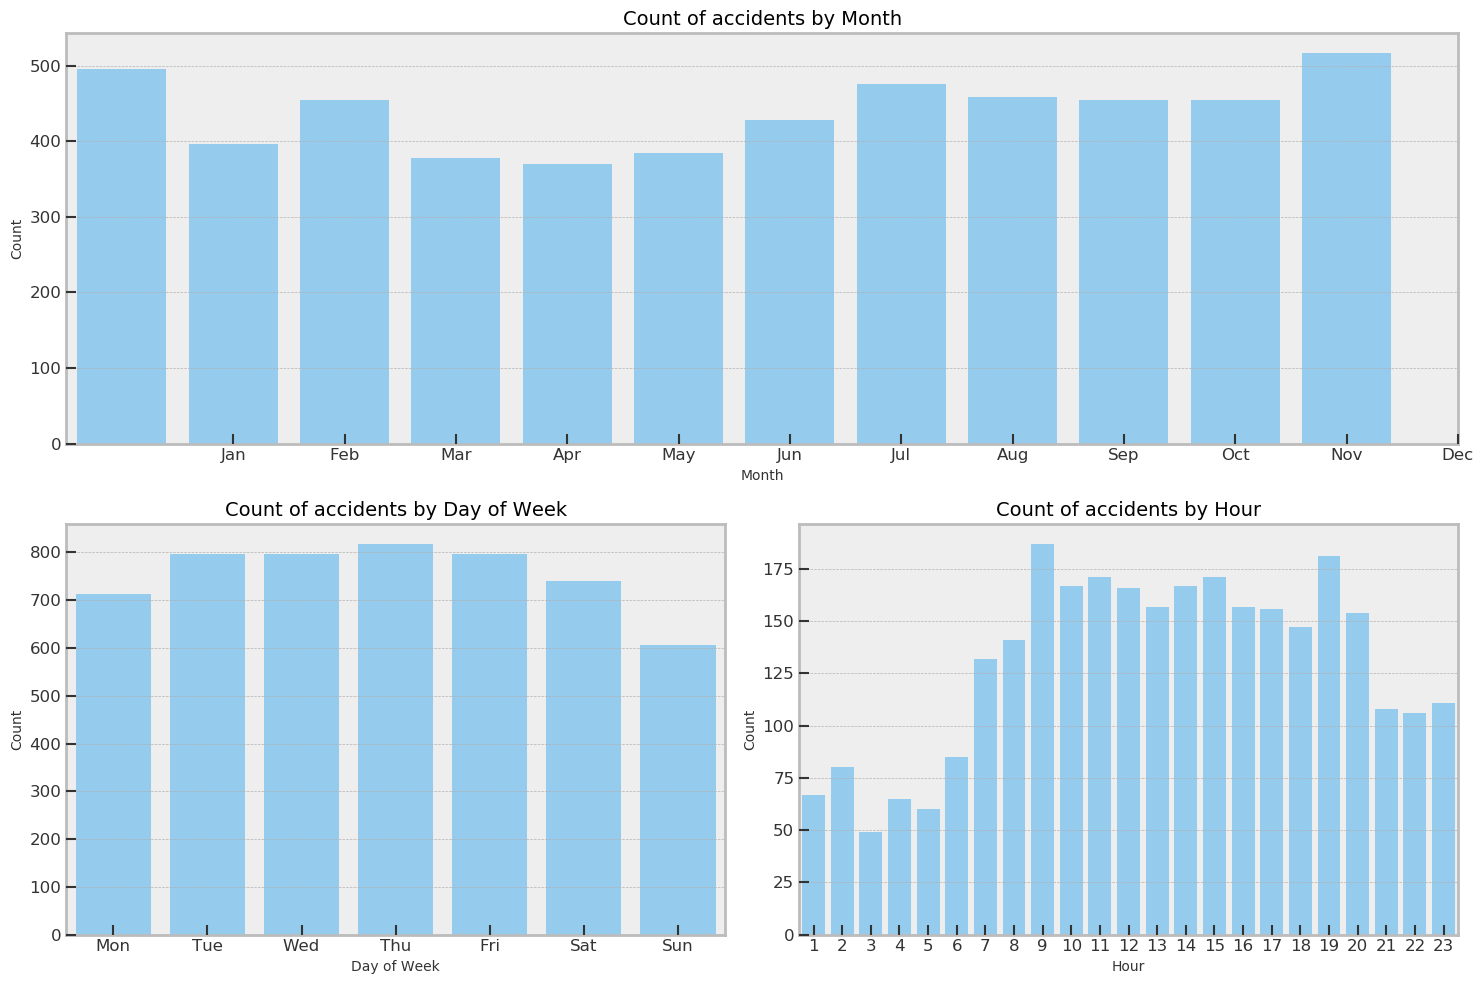

In [7]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Military vs Passenger flights

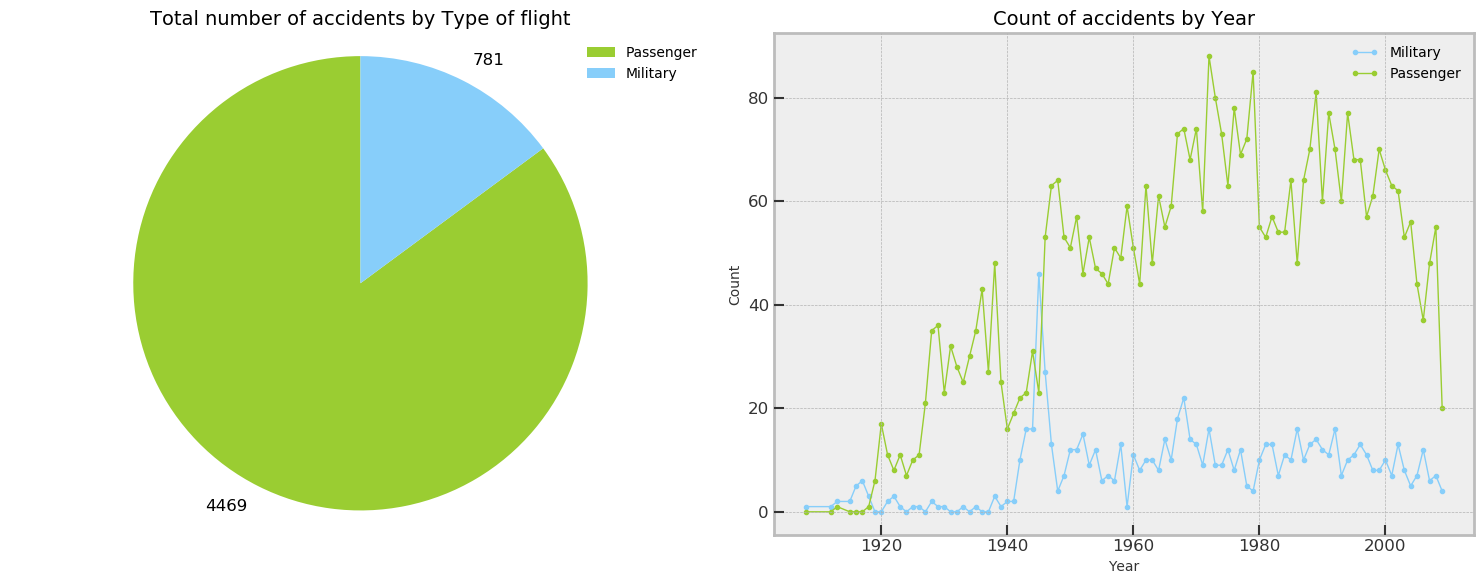

In [8]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Total number of Fatalities

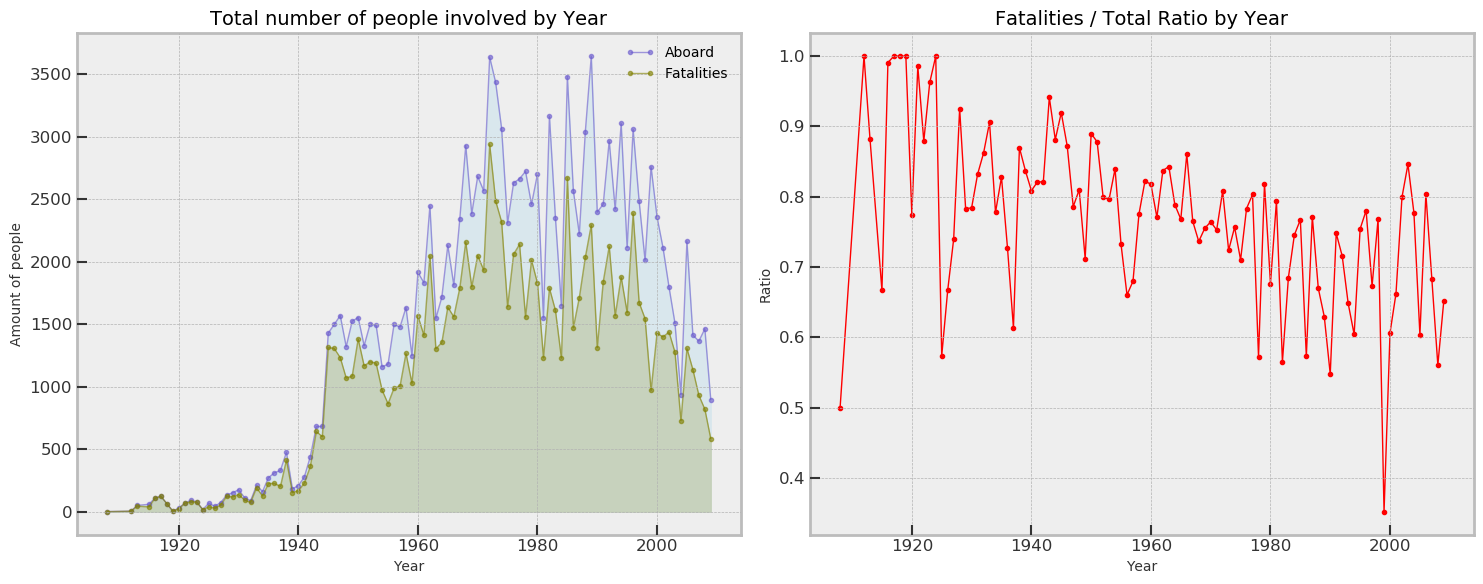

In [9]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Problems with misleading data
So previous plots may look scary - number of fatalities became so high (even so it's seems to trend to decrease after 90s). Also graphs don't show the proportion of accidents by all flights by year. So 1970-1990 look like scary years in the history of airf lights with rise of deaths, but there might be also the rise of total amount of people flyong by air while actually proportion became low.

In [10]:
Totals = pd.read_csv('Dataset2.csv')
Totals.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.235020e+05,2.742800e+05,NaN,NaN
39,Cote d'Ivoire,CIV,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.979187e+04,3.948547e+04,2.349960e+05,2.371200e+05,6.428930e+05,6.670620e+05,8.084710e+05,7.794820e+05,NaN,NaN
243,Tuvalu,TUV,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Cayman Islands,CYM,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,IBRD only,IBD,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.479406e+08,1.029574e+09,1.122724e+09,1.222313e+09,1.340694e+09,1.459596e+09,1.618276e+09,1.767077e+09,NaN,NaN


### Data Cleaning

In [11]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [12]:
Fatalities = Fatalities.reset_index()
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals, Fatalities], axis=1) #joining two data frames into one
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100 #calculating ratio

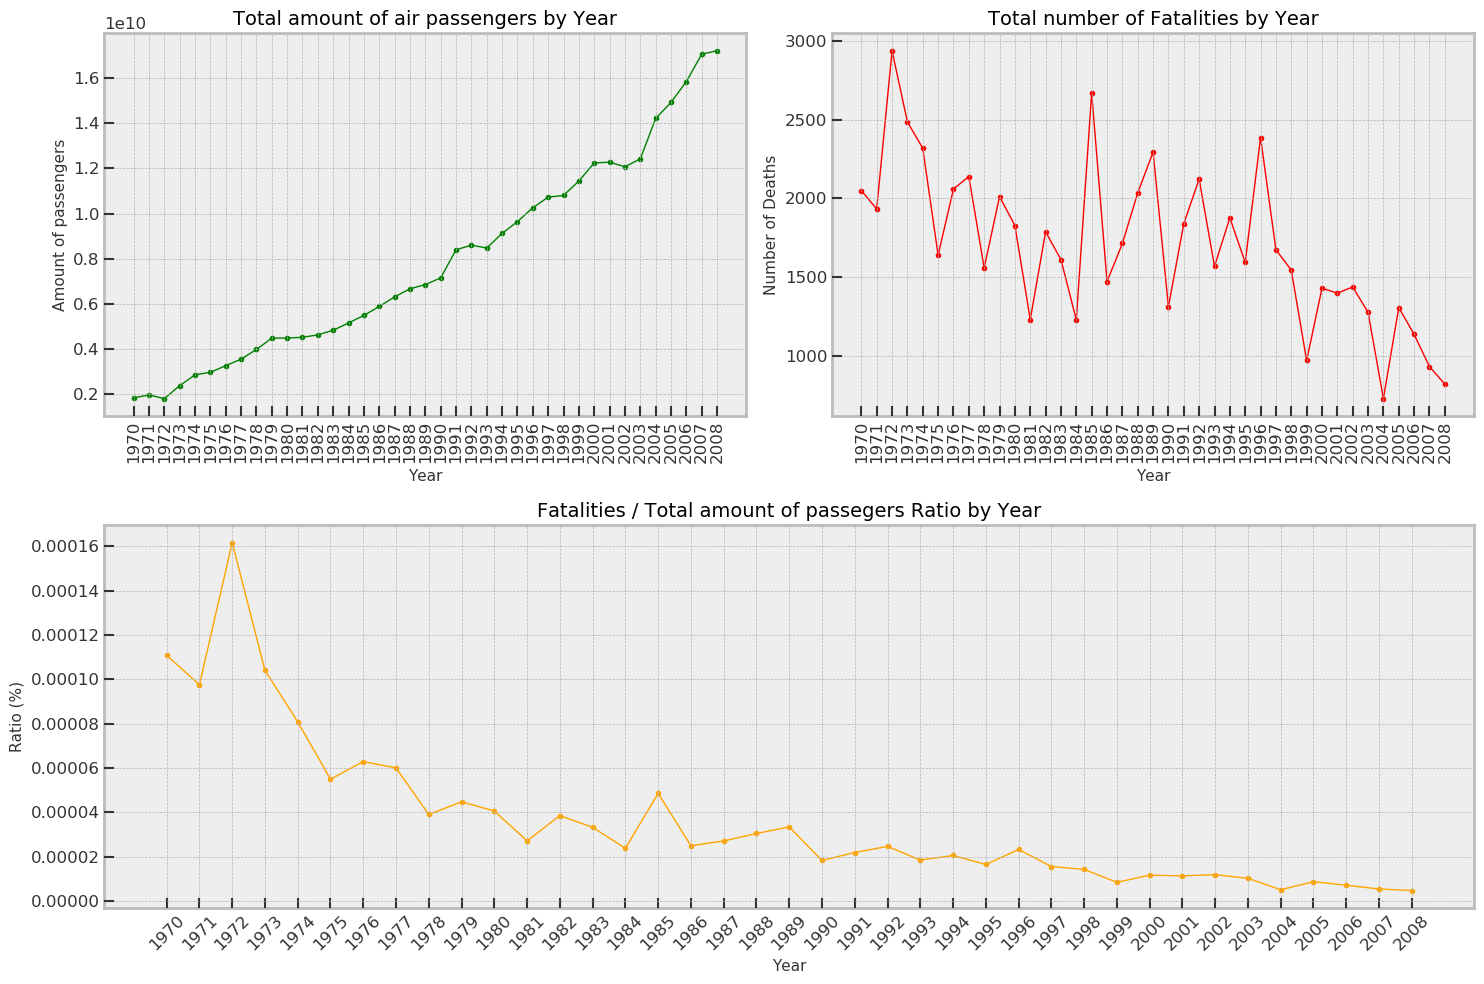

In [13]:
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))

ax = pl.subplot(gs[0, 0]) 
plt.plot(Totals.index, 'Sum', data=Totals, marker = ".", color = 'green', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Amount of passengers', fontsize=11)
plt.title('Total amount of air passengers by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)

ax = pl.subplot(gs[0, 1]) 
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Deaths', fontsize=11)
plt.title('Total number of Fatalities by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)

ax = pl.subplot(gs[1, :]) 
plt.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Ratio (%)', fontsize=11)
plt.title('Fatalities / Total amount of passegers Ratio by Year', loc='Center', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this plot we can see that trend actually goes down which was maybe not so obvious from plot with amount of deaths only. 
Let's put line with ratio and number of deaths on one plot.

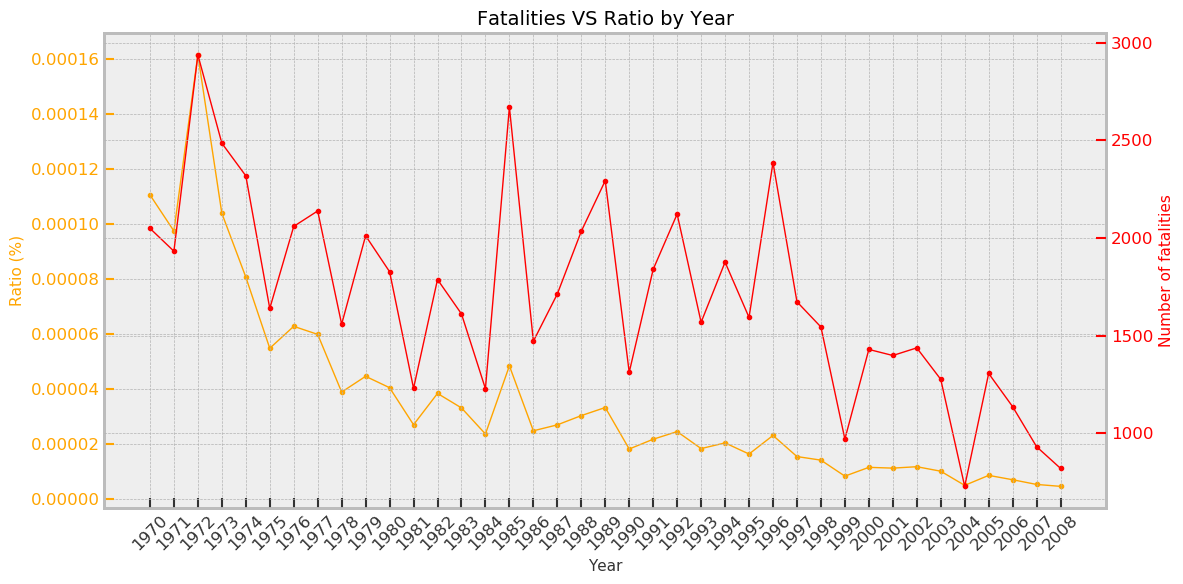

In [14]:
fig =plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='orange', fontsize=11)
ax1.tick_params('y', colors='orange')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
ax2.set_ylabel('Number of fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

We can see that peaks like 1985, 1989, 1992, 1996 look scary, while ratio actually trends down. Of course there are some questions thats are wanted to be asked, like "is it full database of airplane accidents?" or "does total number of passenger include military flights or just passenger?" so this plot is that an estimation.

### Operators Analysis

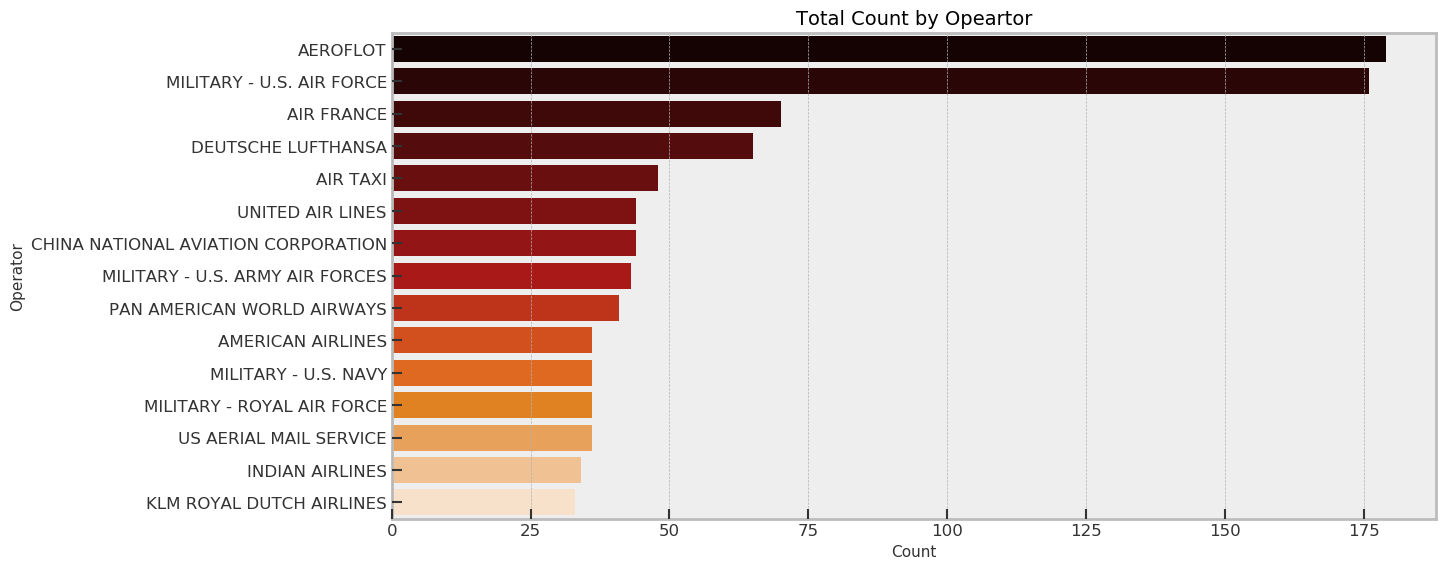

In [15]:
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = Data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()

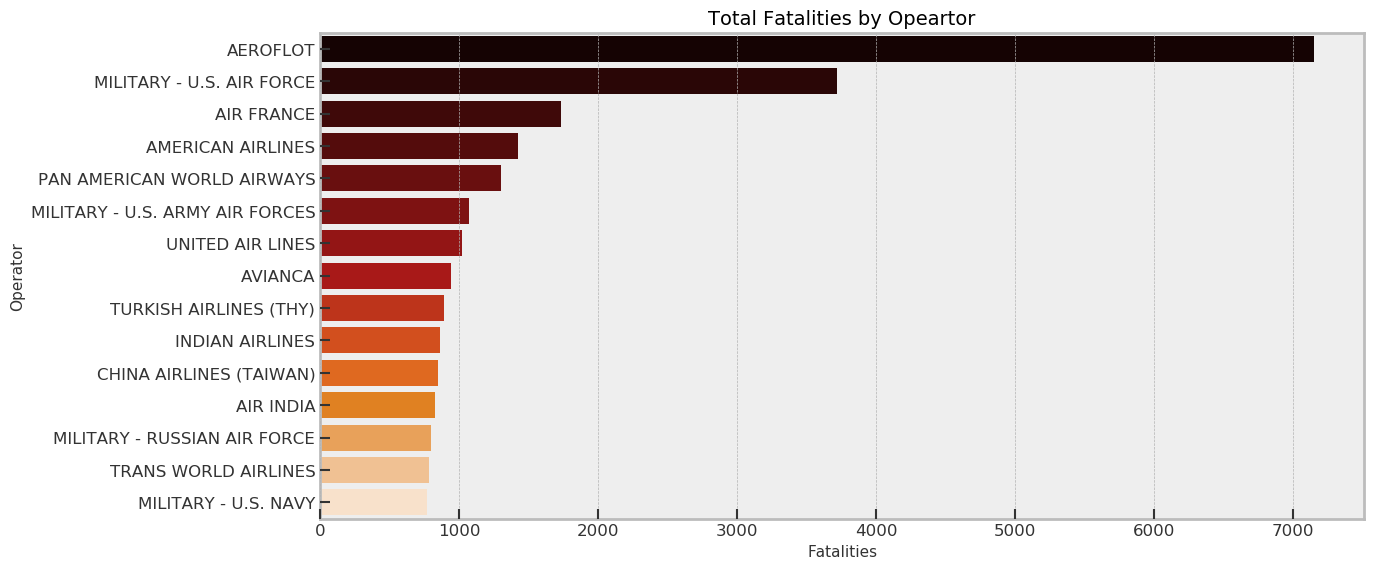

In [16]:
Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_heat", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Let's find out which Flight Operators actually have the least number of people involved:

In [17]:
Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

### World Clouds

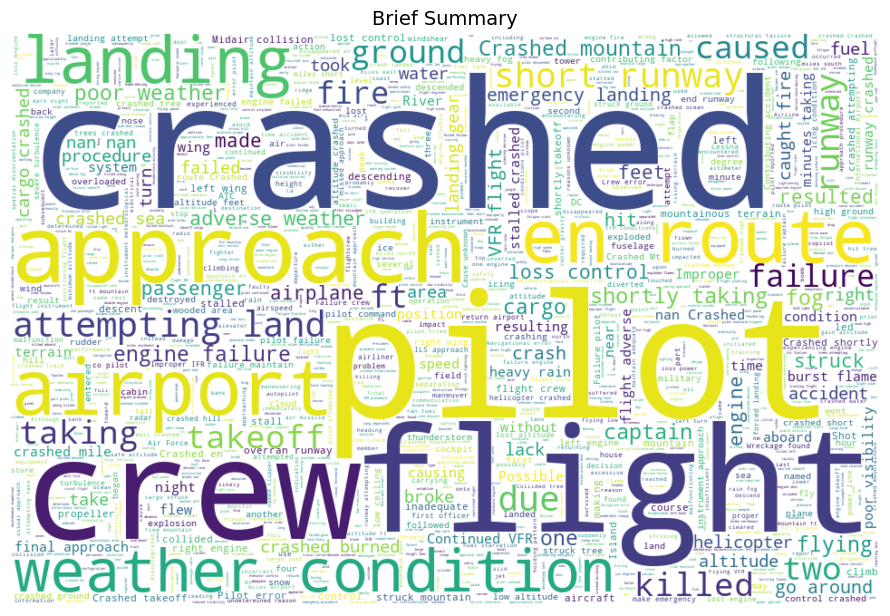

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(Data.Summary.tolist())
plane_mask = np.array(Image.open('image1.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

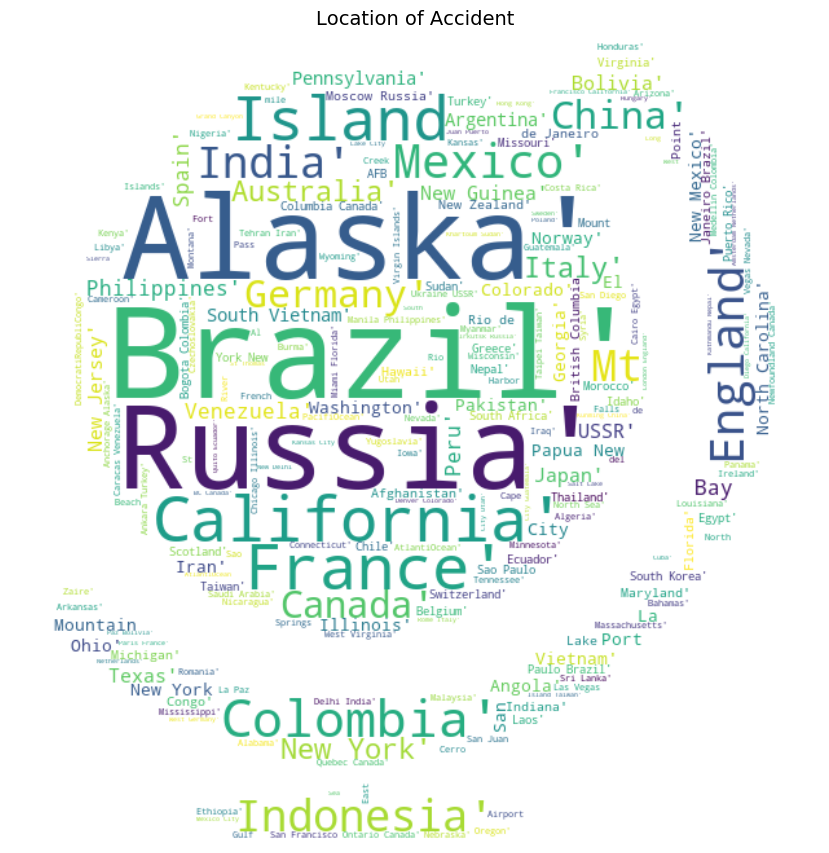

In [19]:
text = str(Data.Location.tolist())
globe_mask = np.array(Image.open('image2.png'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.savefig('./aircraft_globe.png', dpi=50)
plt.show()

### Exploring Aeroflot

It looks like Aeroflot has the most number of accident for all the time.

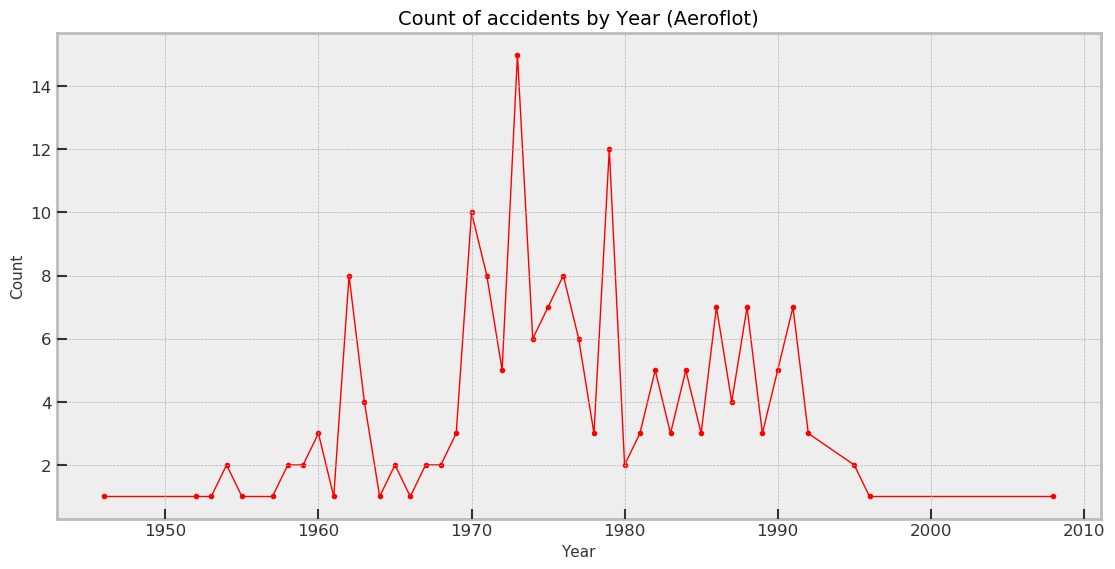

In [20]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

It seems like 1970s were not the best year in history of Aeroflot.
### Conclusion

Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). However we can not make decisions about any Operator like "which airline is much safer to flight with" without knowledge of total amount flights. If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights. 